In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.contingency import association

In [ ]:
df = pd.read_csv('/content/Copy of exhibitions_for_analysis - exhibitions.csv')

In [ ]:
df.head()

,url,country_of_museum,Museum,Museum_full,City_of_museum,Focus_area,Year_of_foundation,Area (m²),Number_of_visitors_per_year (2022),type,...,co-org,sponsor,url.1,objects_type,object_material,object_purpose,online/offline,admission fee,highlights,assotiated events
0,1,GB,BM,British Museum,London,historical,1753.0,75 000,4097253,exhibition,...,Museo de Arte de Lima,PROMPeru,https://www.britishmuseum.org/exhibitions/peru...,ceramics,"metal, textile, stone, wood, clay","cooking, storing food and water, decorative, s...",offline,True,11,TRUE
1,2,GB,BM,British Museum,London,historical,1753.0,75 000,4097253,exhibition,...,NaN,British Petroleum,https://www.britishmuseum.org/exhibitions/hier...,texts,stone,"commemoration, communication",offline,True,7,TRUE
2,3,GB,BM,British Museum,London,historical,1753.0,75 000,4097253,touring exhibition,...,NaN,NaN,https://www.britishmuseum.org/our-work/nationa...,ritual objects,"stone, wood",spiritual,offline,True,NaN,FALSE
3,4,GB,BM,British Museum,London,historical,1753.0,75 000,4097253,touring exhibition,...,NaN,NaN,https://www.britishmuseum.org/our-work/interna...,ritual objects,remains,spiritual,offline,True,1,FALSE
4,5,GB,BM,British Museum,London,historical,1753.0,75 000,4097253,exhibition,...,NaN,The Asahi Shimbun,https://www.britishmuseum.org/exhibitions/shat...,glass vessels,glass,"practical, decorative, spiritual",offline,True,NaN,TRUE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   url                                 94 non-null     int64  
 1   country_of_museum                   94 non-null     object 
 2   Museum                              94 non-null     object 
 3   Museum_full                         94 non-null     object 
 4   City_of_museum                      94 non-null     object 
 5   Focus_area                          94 non-null     object 
 6   Year_of_foundation                  93 non-null     float64
 7   Area (m²)                           76 non-null     object 
 8   Number_of_visitors_per_year (2022)  92 non-null     object 
 9   type                                94 non-null     object 
 10  date start                          86 non-null     object 
 11  date end                            85 non-null

In [ ]:
df.shape

(94, 31)

Категориальные данные: переводим строки в int и группируем то, что нам интересно

In [ ]:
museums = list(set(df.Museum))
cat_museum = []
for i in df.Museum:
  n = museums.index(i) + 1
  cat_museum.append(n)
df['cat_museum'] = cat_museum

In [ ]:
museums

['BM&AG', 'PR', 'MDA', 'MAA', 'MDP', 'BG', 'MNA', 'BM', 'MRS']

In [ ]:
cat_museum

[8,
 8,
 8,
 8,
 8,
 8,
 8,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 9,
 4,
 4,
 9,
 4,
 9,
 9,
 9,
 1,
 6,
 5,
 5,
 7,
 7,
 7,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 2,
 2,
 2,
 2,
 4,
 4,
 9,
 9,
 9,
 9,
 9,
 9,
 5]

In [ ]:
objects = list(set(df.objects_type))
cat_objects = []
for i in df.objects_type:
  n1 = objects.index(i) + 1
  cat_objects.append(n1)
df['cat_objects'] = cat_objects

In [ ]:
objects

[nan,
 'artefacts',
 'armour',
 'archaeological pieces',
 'sculpture',
 'ceramics',
 'national crafts',
 'metalwork',
 'ritual objects',
 'textiles',
 'visual art',
 'glass vessels',
 'musical artefacts',
 'texts']

In [ ]:
cat_objects

[6,
 14,
 9,
 9,
 12,
 11,
 5,
 10,
 8,
 10,
 7,
 7,
 11,
 14,
 7,
 11,
 11,
 7,
 7,
 2,
 11,
 3,
 11,
 11,
 11,
 11,
 5,
 13,
 11,
 11,
 11,
 2,
 2,
 11,
 7,
 11,
 11,
 14,
 11,
 11,
 4,
 11,
 11,
 11,
 10,
 9,
 14,
 4,
 4,
 9,
 11,
 11,
 11,
 6,
 11,
 11,
 10,
 5,
 6,
 9,
 11,
 11,
 9,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
regions = list(set(df.region))
cat_regions = []
for i in df.region:
  n2 = regions.index(i) + 1
  cat_regions.append(n2)
df['cat_regions'] = cat_regions

In [ ]:
regions

['Asia',
 'East Asia',
 'East Africa',
 'South Asia',
 'West Africa',
 'Central America',
 'Central Asia',
 'Latin America',
 'Australia',
 'Arab',
 'South America',
 'Pacific/Oceania',
 'South Africa',
 'North Africa',
 'Middle East',
 'Pacific ',
 nan,
 'Oceania',
 'Pacific',
 'Africa',
 'North America',
 'Central Africa']

In [ ]:
cat_regions

[8,
 14,
 17,
 14,
 15,
 15,
 1,
 15,
 5,
 10,
 7,
 20,
 3,
 4,
 3,
 19,
 5,
 18,
 18,
 4,
 13,
 12,
 22,
 9,
 6,
 21,
 21,
 18,
 21,
 13,
 8,
 2,
 19,
 8,
 19,
 8,
 8,
 8,
 20,
 17,
 8,
 8,
 8,
 11,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 16,
 8,
 8,
 8,
 8,
 8,
 8,
 20,
 8,
 8,
 8,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 14,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 13,
 8,
 8,
 8,
 8,
 8,
 8,
 8]

Категориальные данные: проверка гепотиз

In [ ]:
#H0 - объекты зависят от музеев, в которых они выставляются
#H1 - объекты не зависят от музеев, в которых они выставляются 

In [ ]:
df_museum_objects = pd.crosstab(df['cat_objects'], df['cat_museum']) 
df_museum_objects

cat_museum,1,2,3,4,5,6,7,8,9
cat_objects,,,,,,,,,
1,0,4,0,2,1,0,0,18,6
2,0,0,0,3,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,2,0,1,0,0,0,0
5,0,0,1,1,0,0,0,1,0
6,0,0,2,0,0,0,0,1,0
7,0,3,0,3,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0
9,0,0,2,0,0,0,2,2,0


In [ ]:
df_museum_objects_sum = pd.crosstab(df['cat_objects'], df['cat_museum'], margins=True) 
df_museum_objects_sum

cat_museum,1,2,3,4,5,6,7,8,9,All
cat_objects,,,,,,,,,,
1,0,4,0,2,1,0,0,18,6,31
2,0,0,0,3,0,0,0,0,0,3
3,0,0,0,1,0,0,0,0,0,1
4,0,0,2,0,1,0,0,0,0,3
5,0,0,1,1,0,0,0,1,0,3
6,0,0,2,0,0,0,0,1,0,3
7,0,3,0,3,0,0,0,0,0,6
8,0,1,0,0,0,0,0,0,0,1
9,0,0,2,0,0,0,2,2,0,6


In [ ]:
stats.chi2_contingency(df_museum_objects)

Chi2ContingencyResult(statistic=124.8085213486937, pvalue=0.08046075176878459, dof=104, expected_freq=array([[0.32978723, 4.61702128, 5.60638298, 5.27659574, 0.9893617 ,
        0.32978723, 1.9787234 , 8.24468085, 3.62765957],
       [0.03191489, 0.44680851, 0.54255319, 0.5106383 , 0.09574468,
        0.03191489, 0.19148936, 0.79787234, 0.35106383],
       [0.0106383 , 0.14893617, 0.18085106, 0.17021277, 0.03191489,
        0.0106383 , 0.06382979, 0.26595745, 0.11702128],
       [0.03191489, 0.44680851, 0.54255319, 0.5106383 , 0.09574468,
        0.03191489, 0.19148936, 0.79787234, 0.35106383],
       [0.03191489, 0.44680851, 0.54255319, 0.5106383 , 0.09574468,
        0.03191489, 0.19148936, 0.79787234, 0.35106383],
       [0.03191489, 0.44680851, 0.54255319, 0.5106383 , 0.09574468,
        0.03191489, 0.19148936, 0.79787234, 0.35106383],
       [0.06382979, 0.89361702, 1.08510638, 1.0212766 , 0.19148936,
        0.06382979, 0.38297872, 1.59574468, 0.70212766],
       [0.0106383 , 0.1

In [ ]:
0.08046075176878449 < 0.05 
# объекты не зависят от музеев - типы объектов могут быть равномерно распределены по музеям 

False

In [ ]:
#H0 - объекты зависят от регионов, которые выставляются
#H1 - объекты не зависят от регионы, которые они выставляются 

In [ ]:
df_region_objects = pd.crosstab(df['cat_regions'], df['cat_objects']) 
df_region_objects

cat_objects,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cat_regions,,,,,,,,,,,,,,
1,3,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,10,0,0,3,1,3,0,0,3,2,12,0,0,2
9,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_region_objects_sum = pd.crosstab(df['cat_regions'], df['cat_objects'], margins=True) 
df_region_objects_sum

cat_objects,1,2,3,4,5,6,7,8,9,10,11,12,13,14,All
cat_regions,,,,,,,,,,,,,,,
1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,4
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,0,0,0,0,0,1,0,0,0,1,0,0,0,6
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2
5,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
8,10,0,0,3,1,3,0,0,3,2,12,0,0,2,36
9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
stats.chi2_contingency(df_region_objects)

Chi2ContingencyResult(statistic=402.23511549183604, pvalue=5.636960409641089e-07, dof=273, expected_freq=array([[1.31914894e+00, 1.27659574e-01, 4.25531915e-02, 1.27659574e-01,
        1.27659574e-01, 1.27659574e-01, 2.55319149e-01, 4.25531915e-02,
        2.55319149e-01, 1.70212766e-01, 1.14893617e+00, 4.25531915e-02,
        4.25531915e-02, 1.70212766e-01],
       [3.29787234e-01, 3.19148936e-02, 1.06382979e-02, 3.19148936e-02,
        3.19148936e-02, 3.19148936e-02, 6.38297872e-02, 1.06382979e-02,
        6.38297872e-02, 4.25531915e-02, 2.87234043e-01, 1.06382979e-02,
        1.06382979e-02, 4.25531915e-02],
       [1.97872340e+00, 1.91489362e-01, 6.38297872e-02, 1.91489362e-01,
        1.91489362e-01, 1.91489362e-01, 3.82978723e-01, 6.38297872e-02,
        3.82978723e-01, 2.55319149e-01, 1.72340426e+00, 6.38297872e-02,
        6.38297872e-02, 2.55319149e-01],
       [6.59574468e-01, 6.38297872e-02, 2.12765957e-02, 6.38297872e-02,
        6.38297872e-02, 6.38297872e-02, 1.27659574e-

In [ ]:
5.636960409641089e-07 < 0.05
# объекты зависят в от регионов, которые выставляются на выставках

True

In [ ]:
#H0 - регионы зависят от музеев, в которых выставляются (например, музеи Испании чаще выставляют культуру Латинской Америки или музеи Великобритании чаще выставляют культуру Африки)
#H1 - регионы не зависят от музеев, в которых они выставляются 

In [ ]:
df_region_museums = pd.crosstab(df['cat_regions'], df['cat_museum']) 
df_region_museums

cat_museum,1,2,3,4,5,6,7,8,9
cat_regions,,,,,,,,,
1,0,0,0,1,0,0,0,3,0
2,0,0,0,1,0,0,0,0,0
3,0,6,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0
5,0,2,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0
8,0,0,14,0,3,0,4,4,11
9,0,0,0,1,0,0,0,0,0


In [ ]:
df_region_museums_sum = pd.crosstab(df['cat_regions'], df['cat_museum'], margins=True) 
df_region_museums_sum

cat_museum,1,2,3,4,5,6,7,8,9,All
cat_regions,,,,,,,,,,
1,0,0,0,1,0,0,0,3,0,4
2,0,0,0,1,0,0,0,0,0,1
3,0,6,0,0,0,0,0,0,0,6
4,0,1,0,1,0,0,0,0,0,2
5,0,2,0,0,0,0,0,0,0,2
6,0,0,1,0,0,0,0,0,0,1
7,0,1,0,0,0,0,0,0,0,1
8,0,0,14,0,3,0,4,4,11,36
9,0,0,0,1,0,0,0,0,0,1


In [ ]:
stats.chi2_contingency(df_region_museums)

Chi2ContingencyResult(statistic=319.4632092281357, pvalue=1.6881669537033782e-11, dof=168, expected_freq=array([[0.04255319, 0.59574468, 0.72340426, 0.68085106, 0.12765957,
        0.04255319, 0.25531915, 1.06382979, 0.46808511],
       [0.0106383 , 0.14893617, 0.18085106, 0.17021277, 0.03191489,
        0.0106383 , 0.06382979, 0.26595745, 0.11702128],
       [0.06382979, 0.89361702, 1.08510638, 1.0212766 , 0.19148936,
        0.06382979, 0.38297872, 1.59574468, 0.70212766],
       [0.0212766 , 0.29787234, 0.36170213, 0.34042553, 0.06382979,
        0.0212766 , 0.12765957, 0.53191489, 0.23404255],
       [0.0212766 , 0.29787234, 0.36170213, 0.34042553, 0.06382979,
        0.0212766 , 0.12765957, 0.53191489, 0.23404255],
       [0.0106383 , 0.14893617, 0.18085106, 0.17021277, 0.03191489,
        0.0106383 , 0.06382979, 0.26595745, 0.11702128],
       [0.0106383 , 0.14893617, 0.18085106, 0.17021277, 0.03191489,
        0.0106383 , 0.06382979, 0.26595745, 0.11702128],
       [0.38297872, 

In [ ]:
1.6881669537033782e-11 < 0.05
# регионы зависят от музеев, в которых выставляются

True

In [ ]:
1.6881669537033782e-11 < 5.636960409641089e-07

True

Визуализация

<Axes: xlabel='cat_objects', ylabel='Count'>

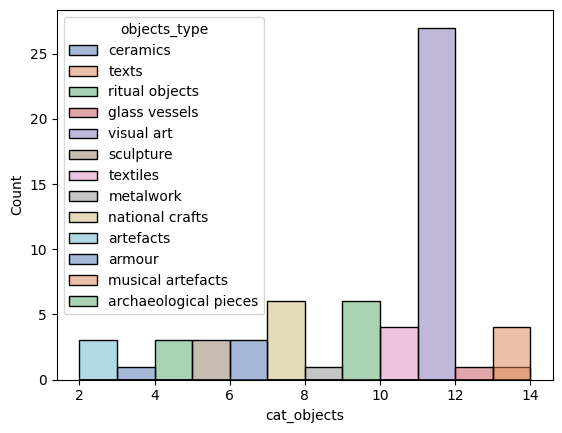

In [ ]:
#популярные и не очень объекты
sns.histplot(data=df, x="cat_objects", hue="objects_type", element="bars", legend=True, binwidth=1, palette="deep")

<Axes: xlabel='cat_regions', ylabel='Count'>

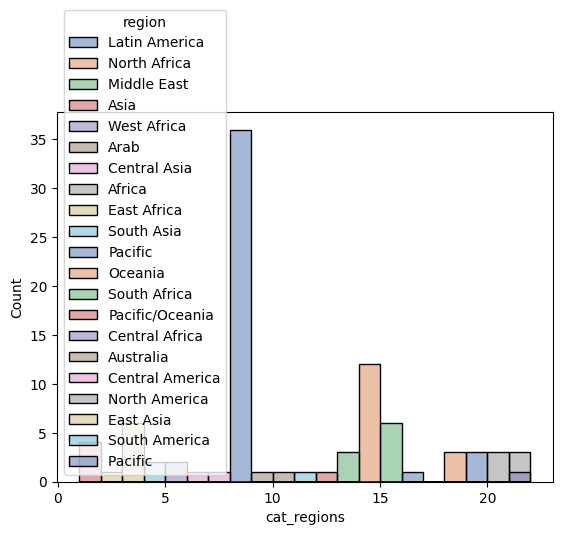

In [ ]:
#популярные и не очень регионы
sns.histplot(data=df, x="cat_regions", hue="region", element="bars", legend=True, binwidth=1, palette="deep")

<Axes: xlabel='Museum', ylabel='cat_objects'>

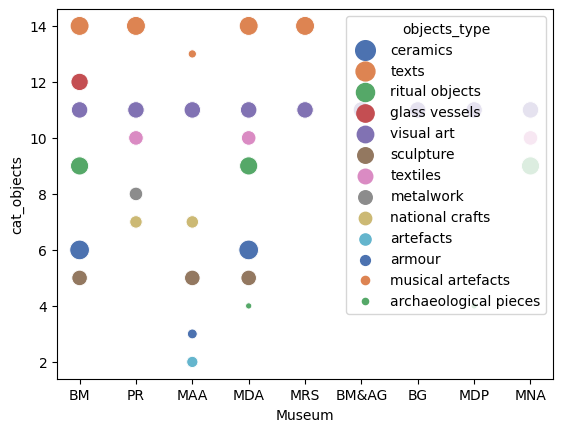

In [ ]:
#корреляция музеи-объекты
sns.scatterplot(data=df, x="Museum", y="cat_objects", hue="objects_type", size="objects_type", sizes=(20, 200), palette="deep", legend=True)

<Axes: xlabel='Museum', ylabel='cat_regions'>

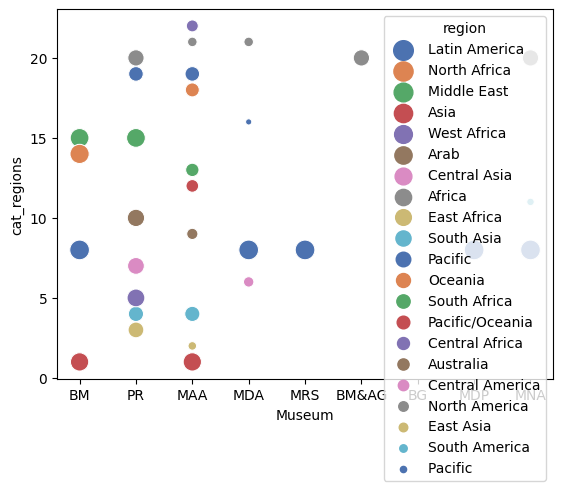

In [ ]:
#корреляция музеи-регионы
sns.scatterplot(data=df, x="Museum", y="cat_regions", hue="region", size="region", sizes=(20, 200), palette="deep")

<Axes: xlabel='cat_objects', ylabel='region'>

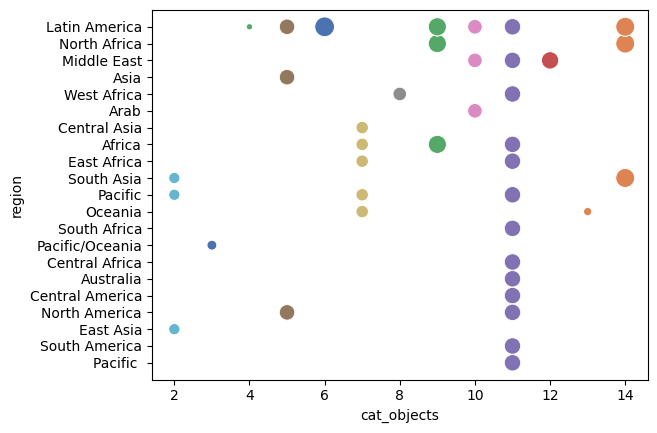

In [ ]:
#корреляция регионы-объекты
sns.scatterplot(data=df, x="cat_objects", y="region", hue="objects_type", size="objects_type", sizes=(20, 200), palette="deep", legend=False)

In [ ]:
#можно попробовать sns.clustermap